In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [20]:
df_case = pd.read_csv('BCCDC_COVID19_Dashboard_Case_Details.csv', parse_dates=['Reported_Date'])
df_lab = pd.read_csv('BCCDC_COVID19_Dashboard_Lab_Information.csv', parse_dates=['Date'])
df_case
#df_lab.head()

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed
4,2020-02-11,Interior,F,30-39,Lab-diagnosed
...,...,...,...,...,...
11849,2020-10-19,Vancouver Coastal,M,70-79,Lab-diagnosed
11850,2020-10-19,Vancouver Coastal,M,70-79,Lab-diagnosed
11851,2020-10-19,Vancouver Coastal,M,90+,Lab-diagnosed
11852,2020-10-20,Northern,F,<10,Lab-diagnosed


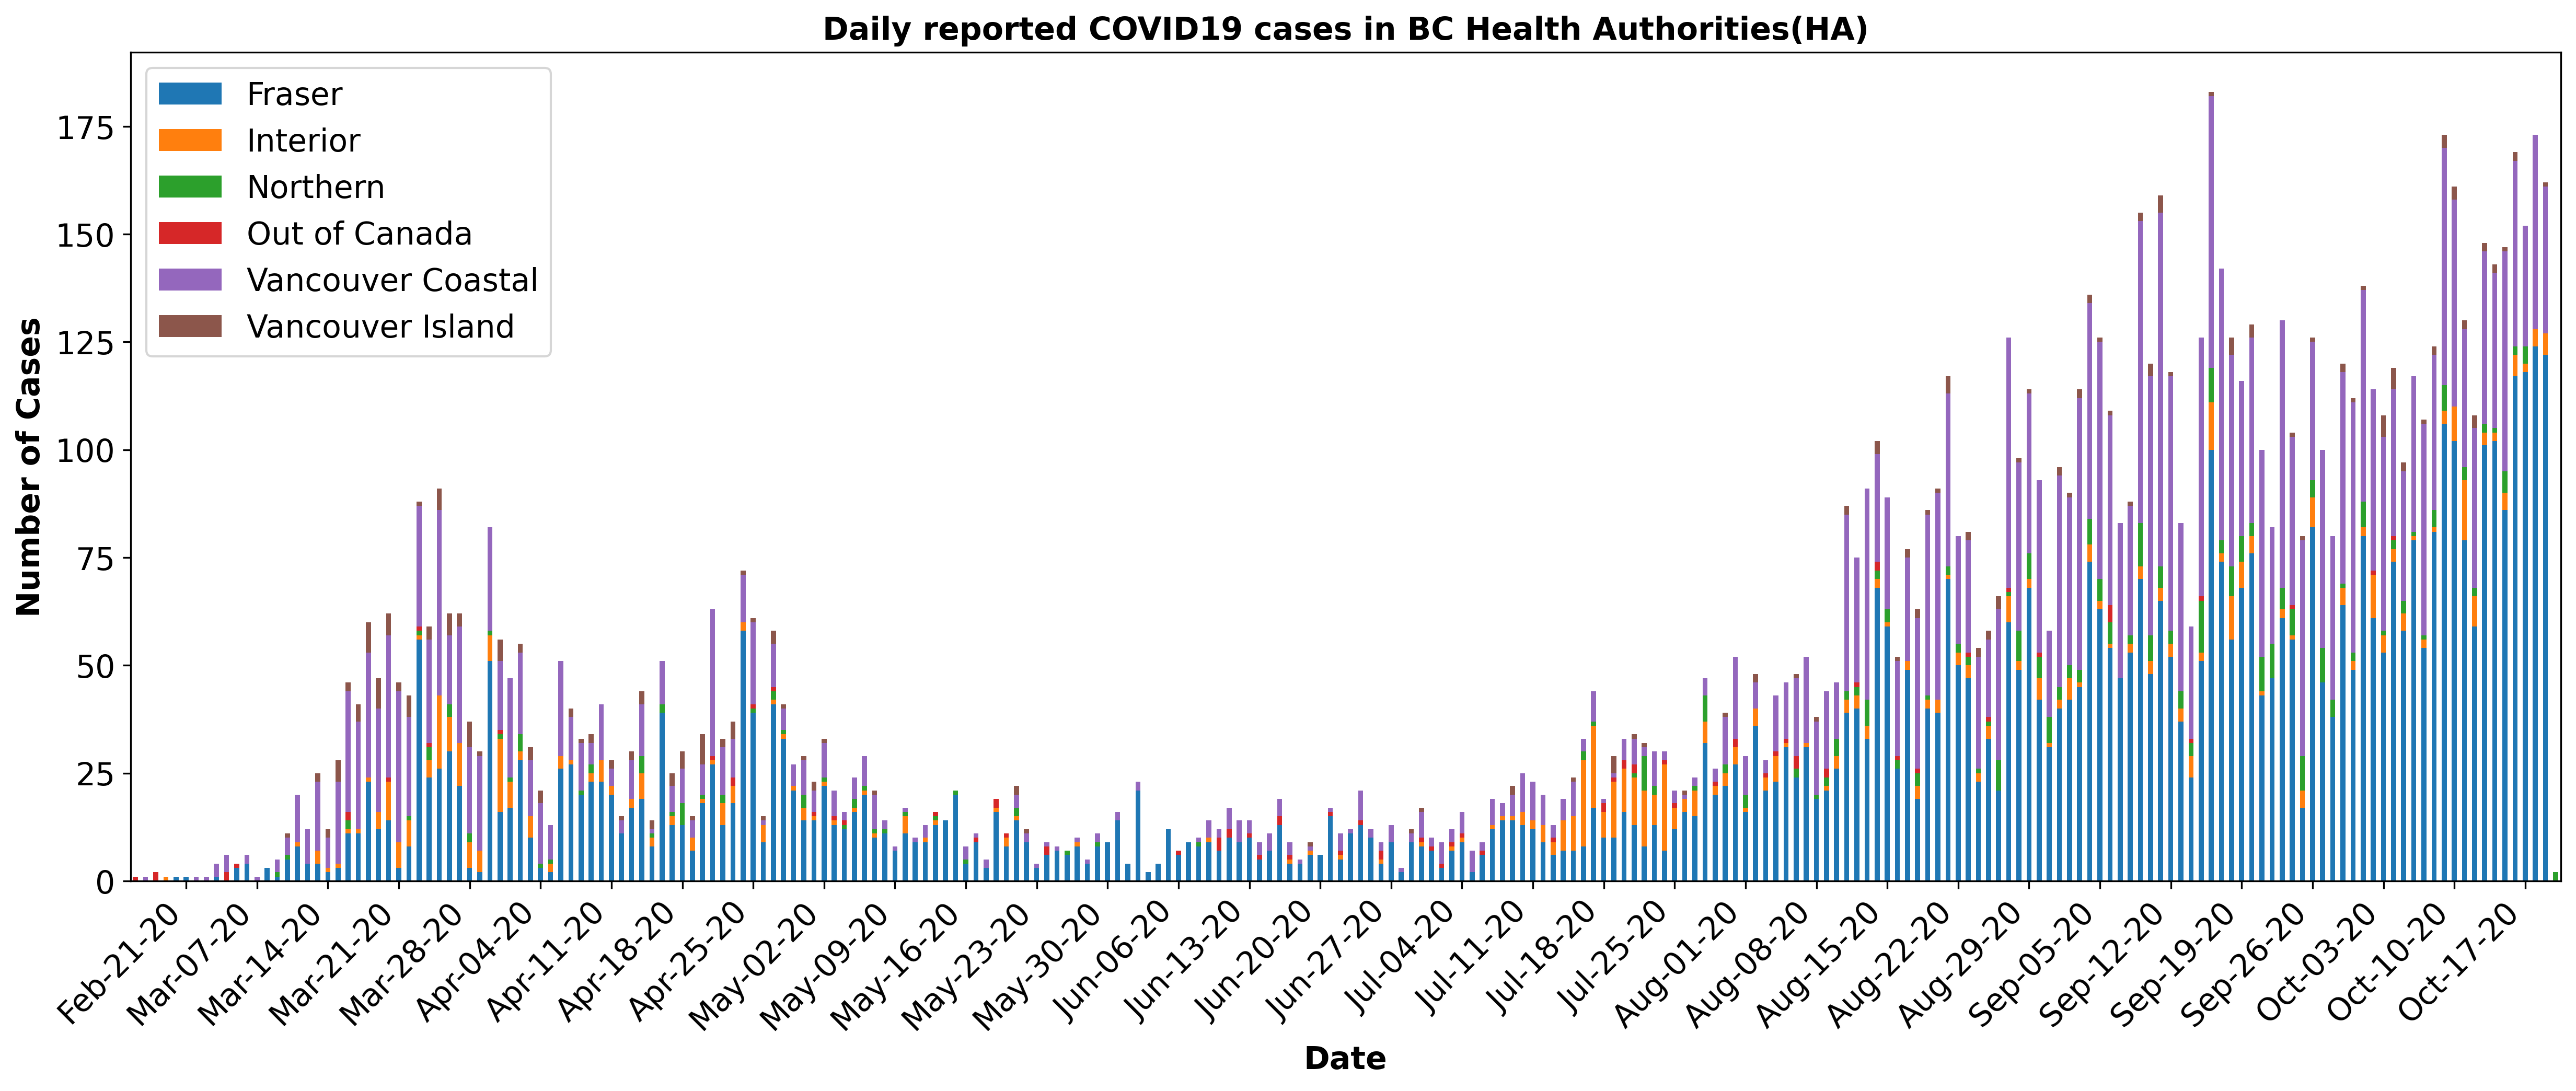

In [22]:
#df_cha = df_case.groupby('Reported_Date')['HA'].value_counts().unstack().fillna(0)
df_cha = df_case.groupby(['Reported_Date', 'HA']).size().unstack('HA').fillna(0) # or use line above, both works
#df_cha.head(20)

fig_1, ax1 = plt.subplots(figsize=(20,7), dpi=300)
df_cha.set_index(df_cha.index.map(lambda s: s.strftime('%b-%d-%y'))).plot.bar(stacked=True, ax=ax1)
#df_cha.plot.bar(stacked=True, ax=ax1, rot=45)
ax1.set_xlabel('Date', fontsize='x-large', fontweight='bold',)
ax1.set_ylabel('Number of Cases', fontsize='x-large',fontweight='bold')
ax1.set_title('Daily reported COVID19 cases in BC Health Authorities(HA)', fontsize='x-large',fontweight='bold')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large')
plt.yticks(
    fontsize='x-large')
plt.legend(loc=2, fontsize='x-large')
import matplotlib.dates as mdates
#set ticks every wee
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())


In [211]:
fig_1.savefig('fig1_daily_cases.png', bbox_inches = 'tight')

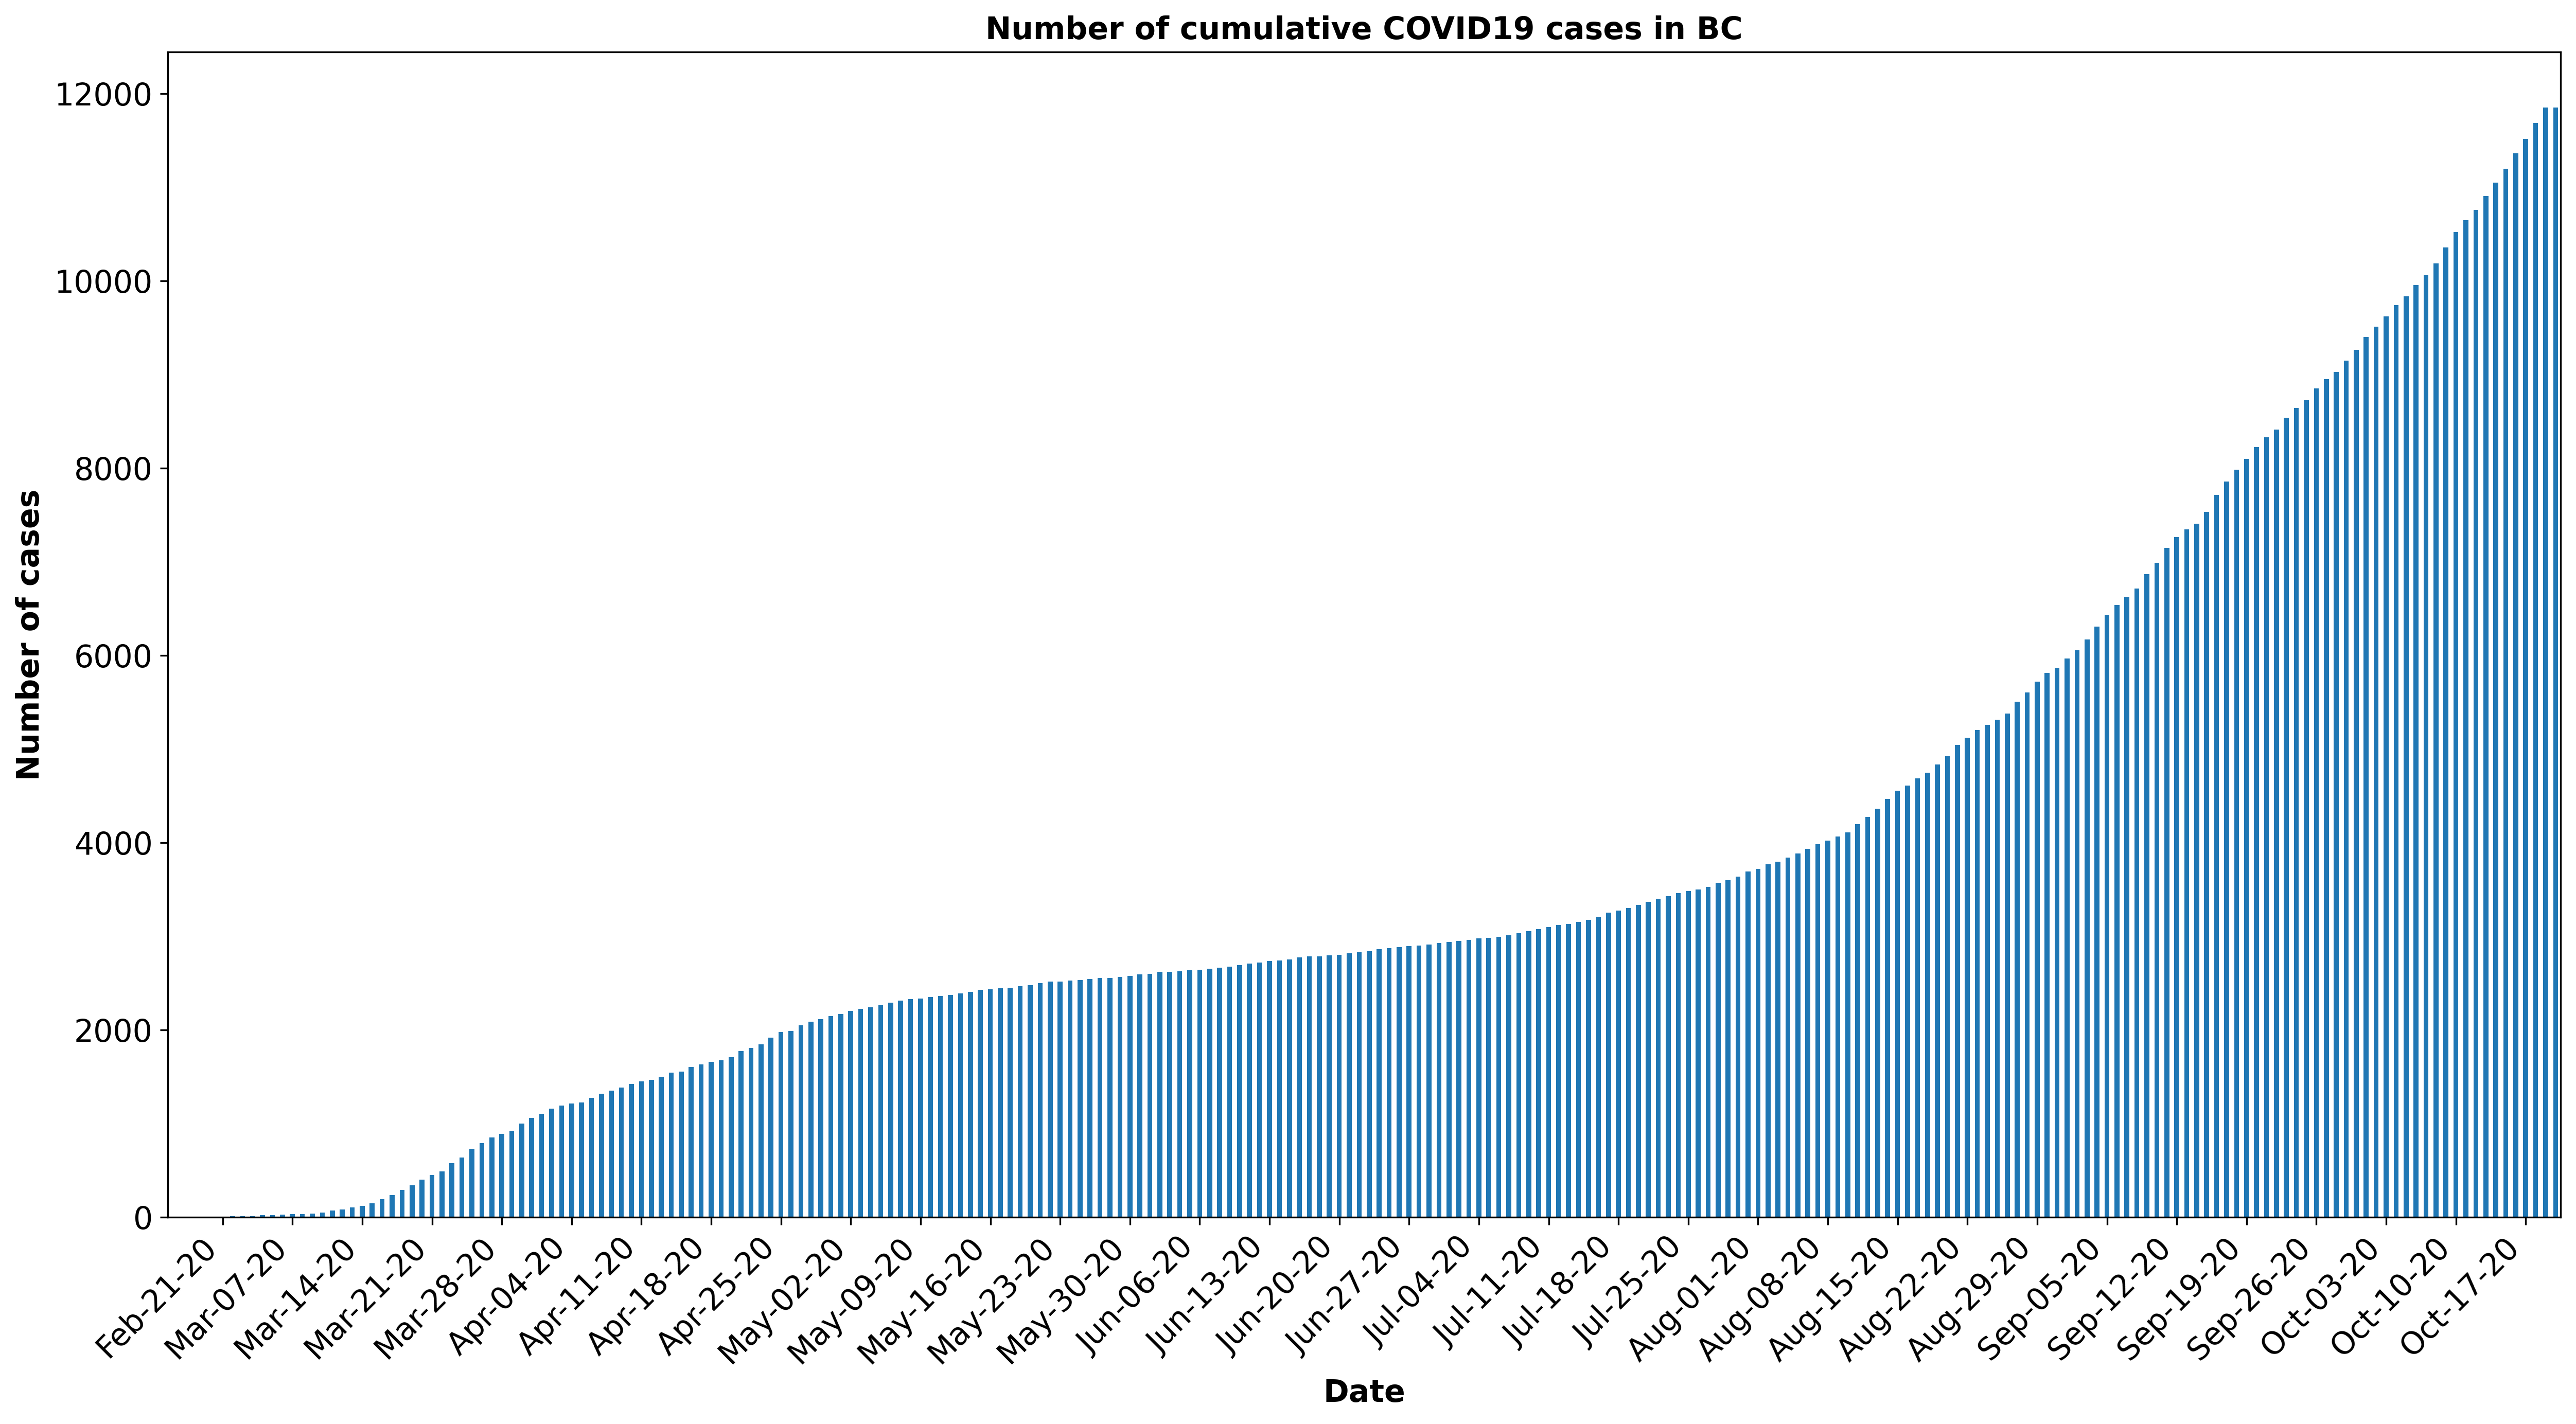

In [24]:
#cumulative cases
df_ccum = df_cha.sum(axis=1).cumsum()
fig_2, ax2 = plt.subplots(figsize=(20,10), dpi=300)
df_ccum.reindex(df_ccum.index.map(lambda s: s.strftime('%b-%d-%y'))).plot(kind='bar',ax=ax2)
#df_ccum.plot.bar(ax=ax2)
ax2.set_xlabel('Date', fontsize='x-large', fontweight='bold',)
ax2.set_ylabel('Number of cases', fontsize='x-large',fontweight='bold')
ax2.set_title('Number of cumulative COVID19 cases in BC', fontsize='x-large',fontweight='bold')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large')
plt.yticks(
    fontsize='x-large')

#set ticks every wee
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))


In [25]:
fig_2.savefig('fig2_cumulative_cases.png', bbox_inches = 'tight')

In [244]:
df_case['Age_Group'].unique()

array(['40-49', '50-59', '20-29', '30-39', '60-69', '80-89', '10-19',
       '70-79', '<10', '90+', 'Unknown'], dtype=object)

In [5]:
#remove unknown data for age and sex
df_crem = df_case.loc[~((df_case['Age_Group']=='Unknown') | (df_case['Sex']=='U'))]
#only removed 0.5% data, so we can ignore the entries which have unknown for age/sex
#df_crem.count()/df_case.count()
df_crem.count()

Reported_Date              11800
HA                         11800
Sex                        11800
Age_Group                  11800
Classification_Reported    11800
dtype: int64

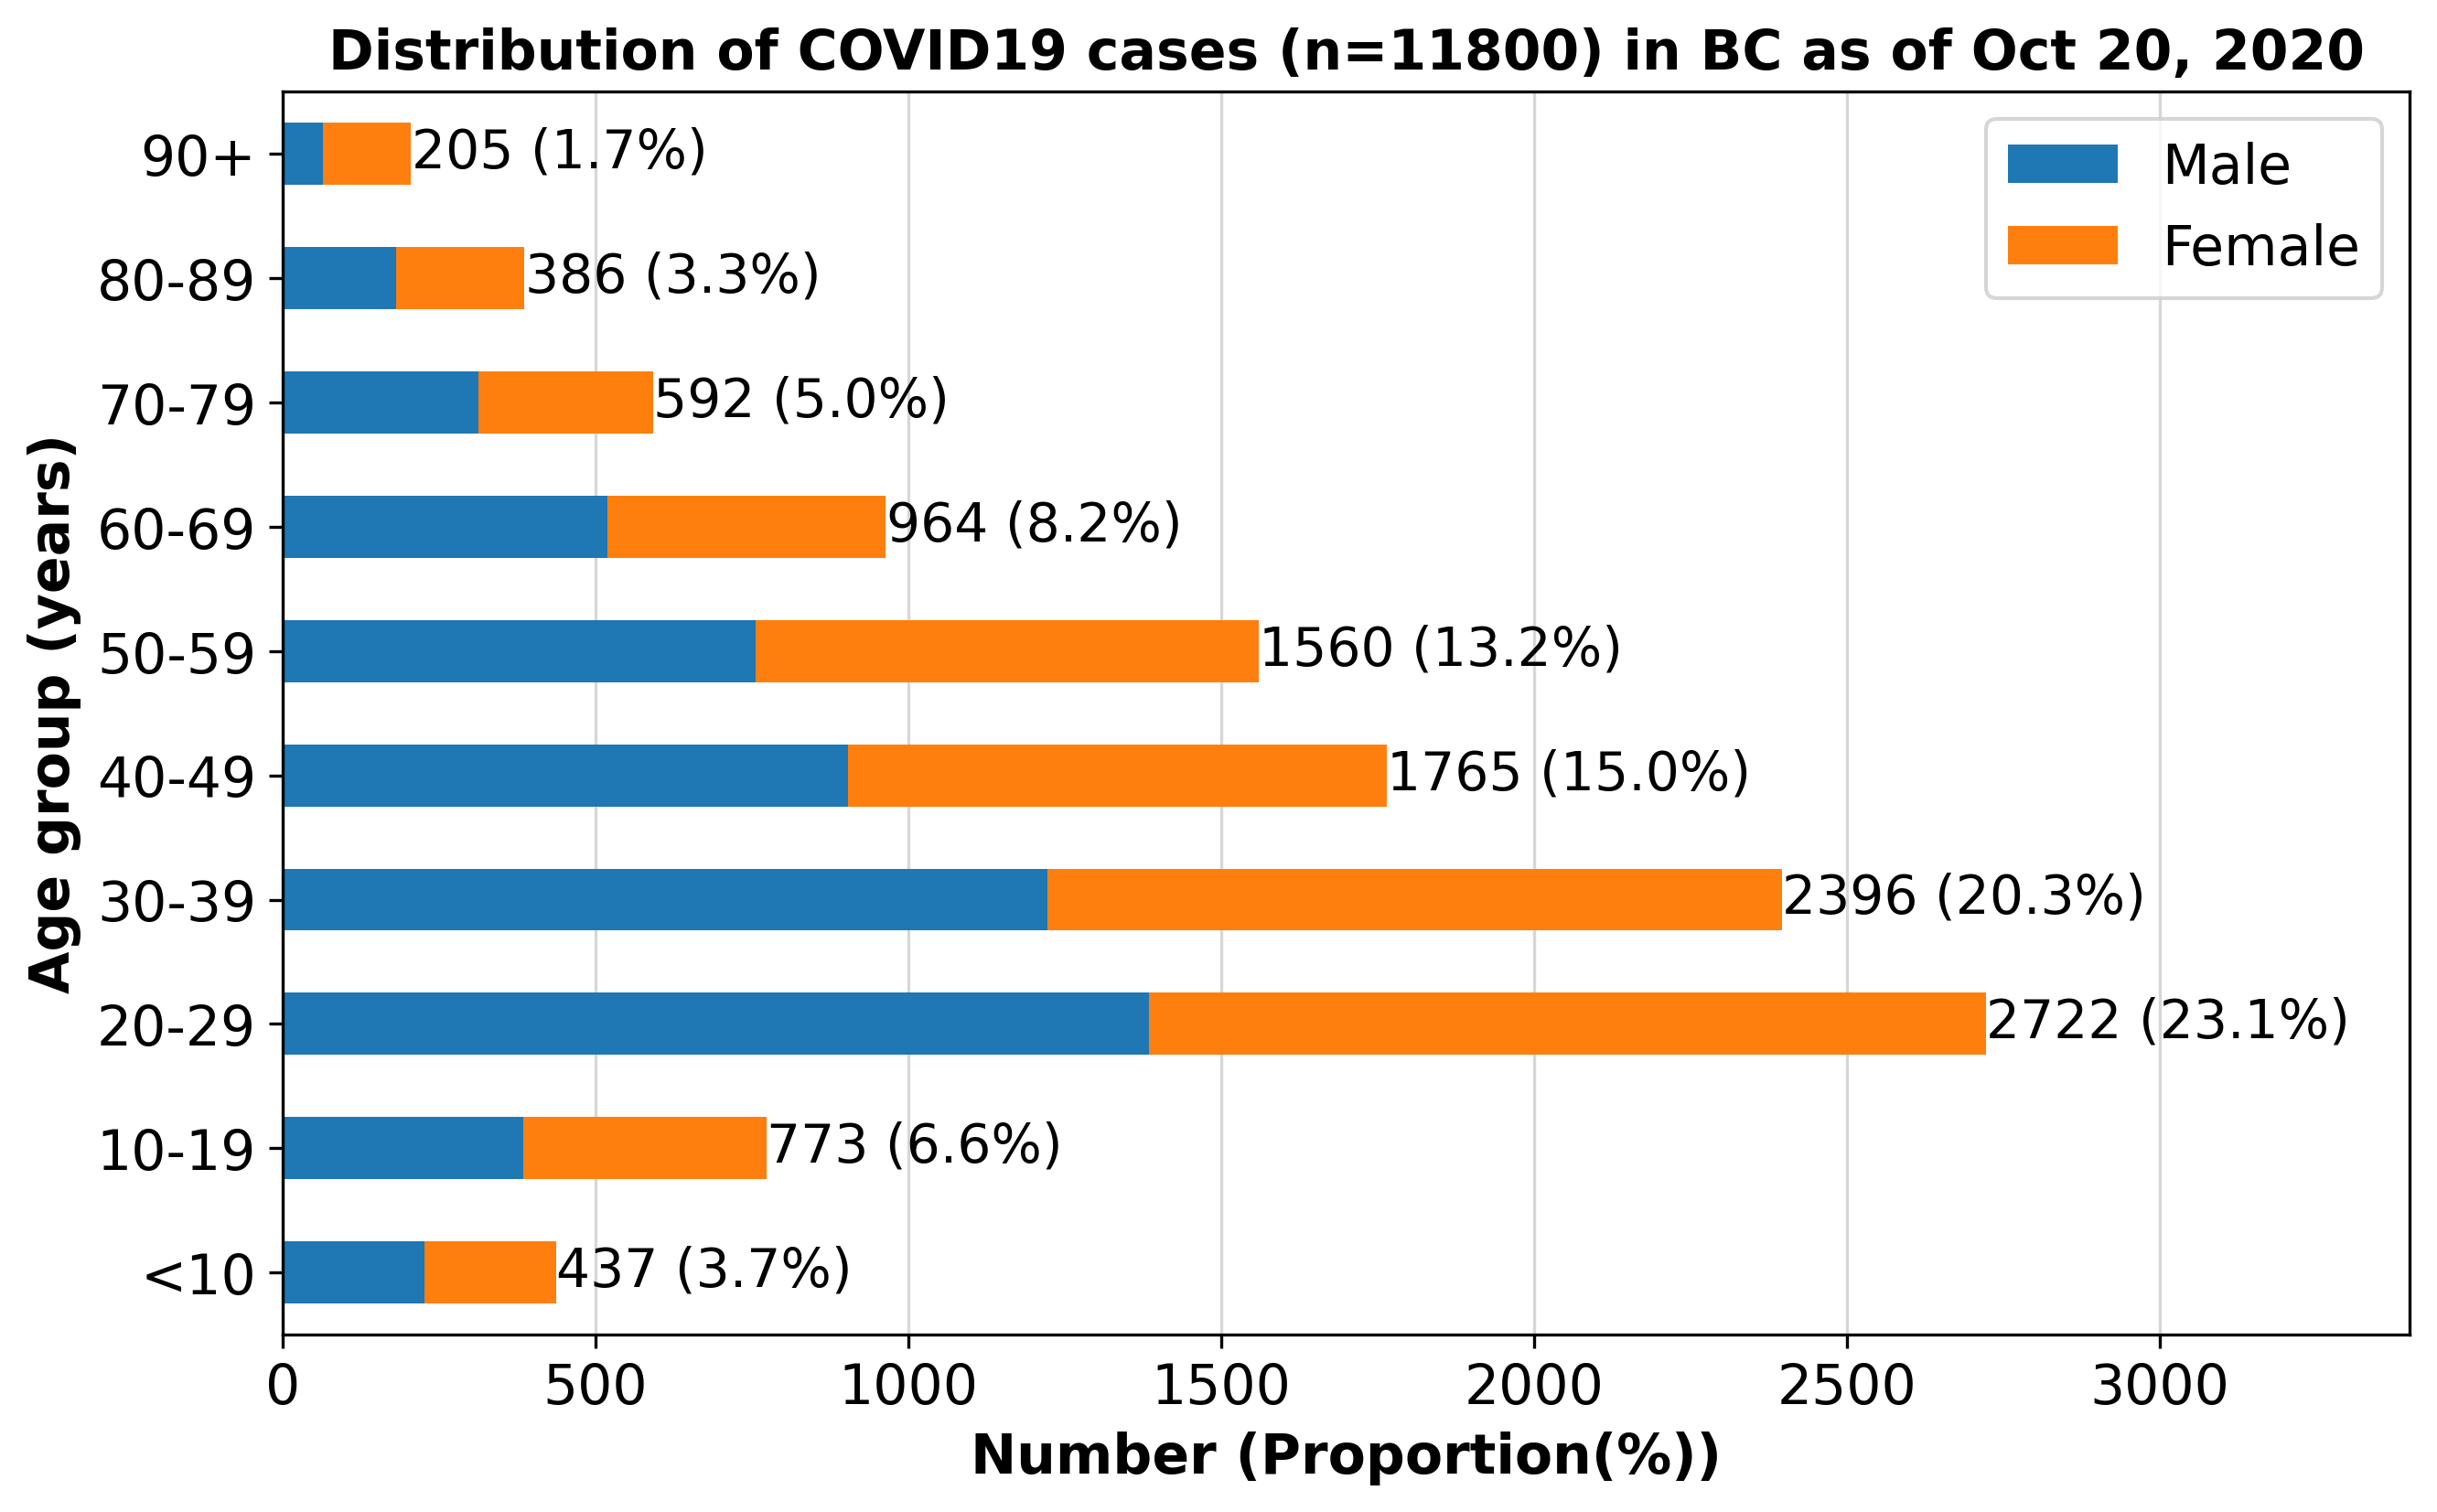

In [6]:
index_ordered = ['<10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90+']
df_demo = df_crem.groupby(['Age_Group', 'Sex']).size().unstack('Sex').reindex(index_ordered)[['M', 'F']]
# fig_3 = plt.figure(figsize=(8,4), dpi=300)
# ax3 = fig_3.add_axes([0,0,0.5,0.8])
fig_3, ax3 = plt.subplots(figsize=(10,6), dpi=300)

df_demo.plot(kind='barh', stacked=True, ax=ax3)
ax3.set_axisbelow(True)
ax3.grid(axis='x', alpha=0.5, linestyle='-')
ax3.set_xlabel('Number (Proportion(%))', fontsize='x-large', fontweight='bold',)
ax3.set_ylabel('Age group (years)', fontsize='x-large',fontweight='bold')
ax3.set_title('Distribution of COVID19 cases (n=11800) in BC as of Oct 20, 2020', fontsize='x-large',fontweight='bold')
plt.legend(('Male', 'Female'),fontsize='x-large')
plt.xticks(
    fontsize='x-large')
plt.yticks(
    fontsize='x-large')
ax3.set_xlim(0, 3400)
#add number and percentage
for i in range(10):
        number = ax3.patches[i].get_width() + ax3.patches[i+10].get_width()
        percentage = 100*(ax3.patches[i].get_width() + ax3.patches[i+10].get_width())/len(df_crem)
        text_str = '{:.0f} ({:.1f}%)'.format(number, percentage)
        x = ax3.patches[i+10].get_x() + ax3.patches[i+10].get_width() + 0.5
        y = ax3.patches[i+10].get_y() + ax3.patches[i+10].get_height()/3.5
        ax3.annotate(text_str, (x, y), fontsize=14)

In [396]:
fig_3.savefig('fig3_demo.png', bbox_inches = 'tight')

In [37]:
df_lab.loc[~(df_lab['Region']=='BC')].tail(20)

,Date,Region,New_Tests,Total_Tests,Positivity,Turn_Around
1867,2020-10-16,Vancouver Coastal,2720,235089,2.02,31
1868,2020-10-16,Vancouver Island,1218,86573,0.16,22
1870,2020-10-17,Fraser,4893,273580,2.02,40
1871,2020-10-17,Interior,800,83998,1.50,34
1872,2020-10-17,Northern,264,26282,1.52,35
1873,2020-10-17,Unknown,183,12640,0.00,39
1874,2020-10-17,Vancouver Coastal,3762,238851,0.77,35
1875,2020-10-17,Vancouver Island,1291,87864,0.08,24
1877,2020-10-18,Fraser,3439,277019,4.45,42
1878,2020-10-18,Interior,563,84561,1.07,38


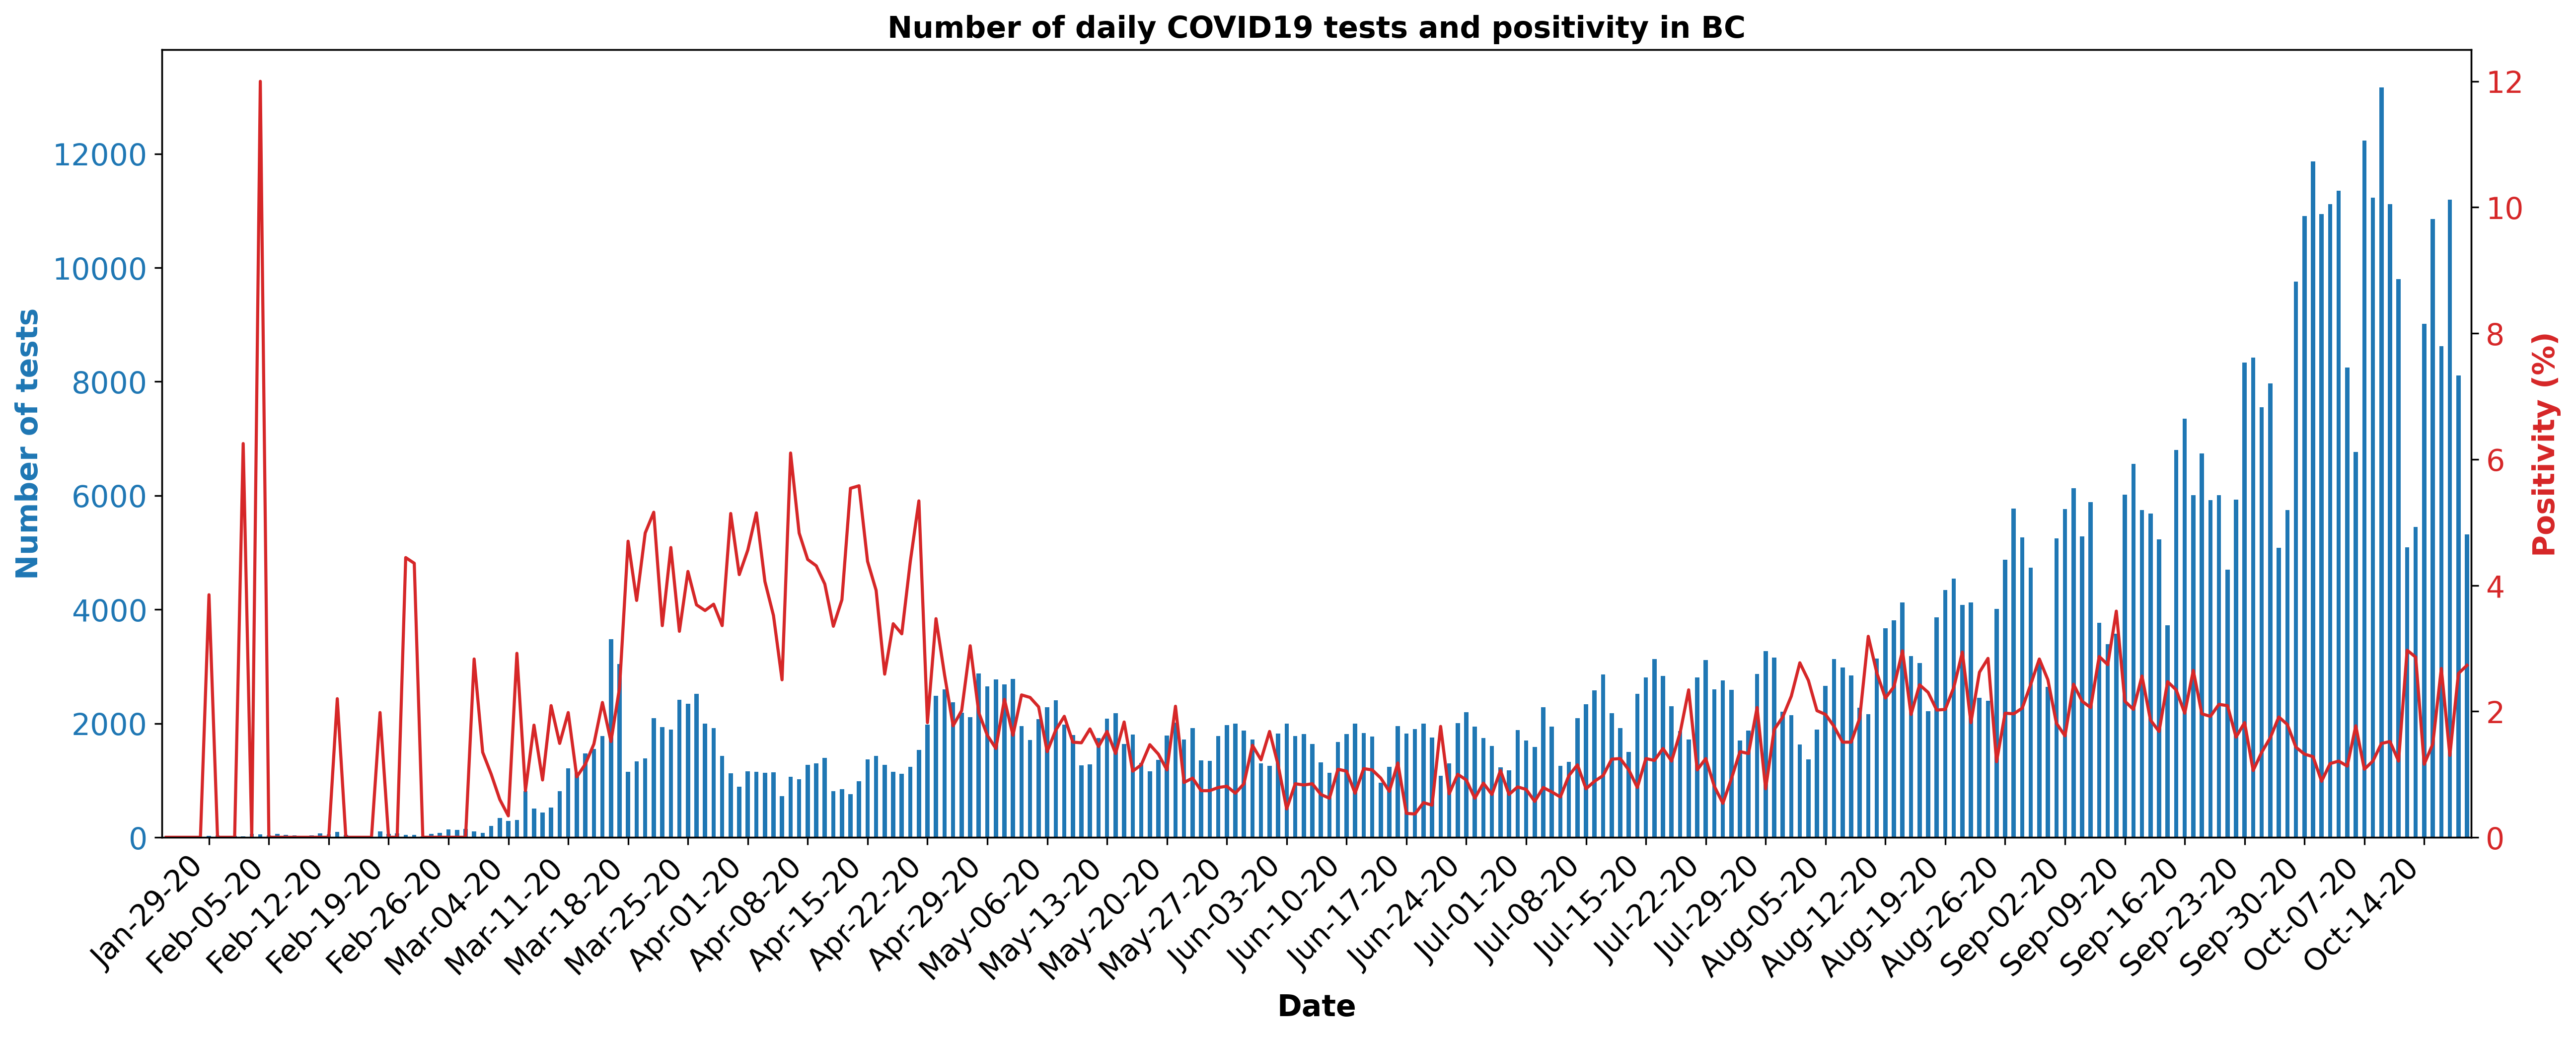

In [87]:
df_testbc = df_lab.loc[(df_lab['Region']=='BC')].set_index('Date')
fig_4, ax4 = plt.subplots(figsize=(20,7), dpi=300)
df_testbc.plot.bar(y='New_Tests', ax=ax4, legend=False)
plt.yticks(
    fontsize='x-large')
for tl in ax4.get_yticklabels():
    tl.set_color('#1f77b4')
ax4.set_ylabel('Number of tests', fontsize='x-large',fontweight='bold', color='#1f77b4')
ax4.set_title('Number of daily COVID19 tests and positivity in BC', fontsize='x-large',fontweight='bold')
ax4.set_xlabel('Date', fontsize='x-large', fontweight='bold')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large')
plt.yticks(
    fontsize='x-large')

ax5 = ax4.twinx()
ax5.plot(df_testbc.index.map(lambda s: s.strftime('%b-%d-%y')), df_testbc['Positivity'], color='#d62728')
ax5.set_ylabel('Positivity (%)', color='#d62728', fontsize='x-large', fontweight='bold')
for tl in ax5.get_yticklabels():
    tl.set_color('#d62728')
plt.yticks(
    fontsize='x-large')
plt.ylim([0, df_testbc['Positivity'].max()+.5])
ax5.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))

In [88]:
fig_4.savefig('fig4_daily_test.png', bbox_inches = 'tight')